## Box Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape.

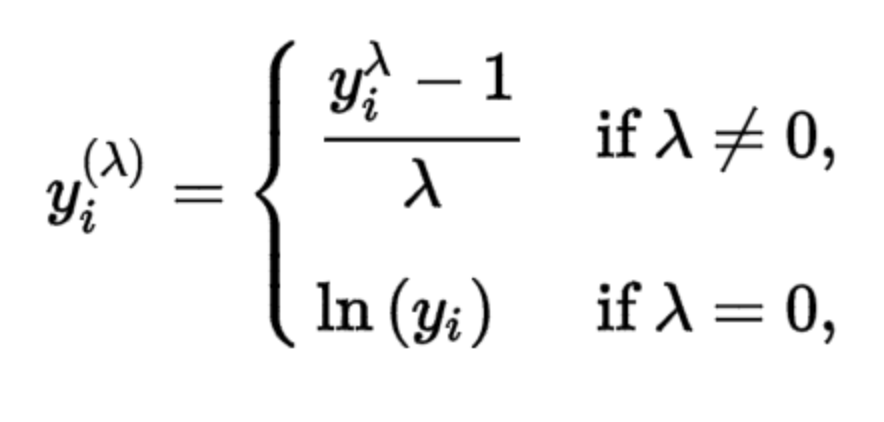

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset

data=pd.read_csv('bigmart.csv')

In [3]:
#checking for the first five rows of the dataset

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
from scipy.special import boxcox, boxcox1p

# finding skewed features

from scipy.stats import skew

numerical_feats = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)


# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(10)

,skew
Item_Outlet_Sales,1.177323
Item_Visibility,1.166885
Item_MRP,0.127180
Item_Weight,0.082409
Outlet_Establishment_Year,-0.396571


If the skewness is less than -1 and greater than 1, the distribution is highly skewed.
If the skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed and if the distribution is between -0.5 and 0.5, the distribution is approximately symmetric.

In [5]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.5)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
 

data[skewed_features] = np.log1p(data[skewed_features])

There are 5 skewed numerical features to box cox transform


In [6]:

numerical_feats = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)


# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(10)

,skew
Item_Visibility,1.047621
Item_Weight,-0.400219
Outlet_Establishment_Year,-0.400788
Item_MRP,-0.817965
Item_Outlet_Sales,-1.074337
